In [15]:
# import packages
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
current_dir = os.getcwd()
current_dir

'D:\\DS_projects\\assignment_numpy\\notebooks'

In [17]:
# load image
image = Image.open('../data/input/gekkie.jpg')

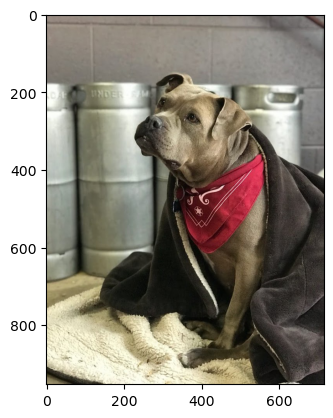

In [18]:
# convert image to numpy array and display
np_image = np.array(image)
plt.imshow(np_image)
plt.show()

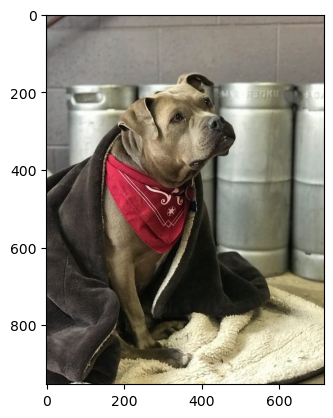

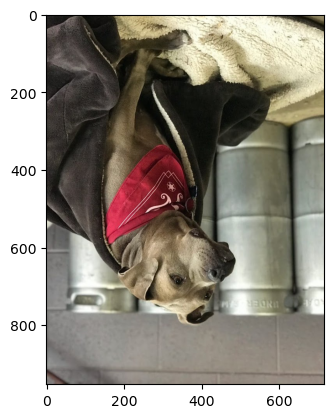

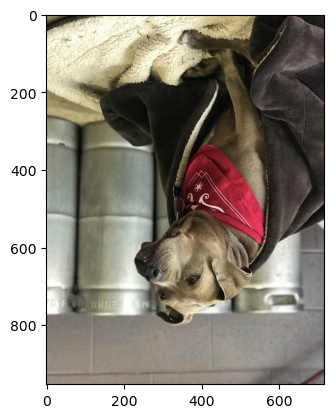

In [19]:
# Flip array to mirror the original
mirrored_image = np.flip(np_image, axis = 1)
plt.imshow(mirrored_image)
plt.show()

# Flip rgb_array so that it is upside down
upside_down_image = np.flip(np_image, axis = (0,1))
plt.imshow(upside_down_image)
plt.show()

# mirror the upside down image
upside_down_mirror_image = np.flip(np_image, axis = 0)
plt.imshow(upside_down_mirror_image)
plt.show()

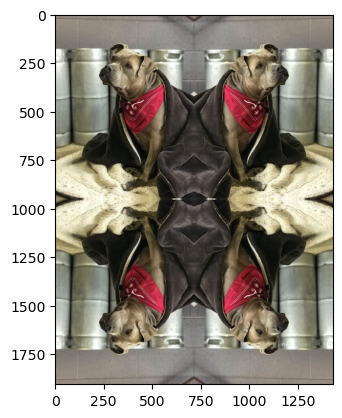

In [20]:
def plot_rotation_image(image):
    """
    Plot the rotation image by concatenating the original image with its mirrored, upside-down, and mirrored upside-down versions.

    Parameters:
    image (numpy.ndarray): The input image to be plotted.

    Returns:
    None
    """
    mirrored_image = np.flip(image, axis=1)
    upside_down_image = np.flip(image, axis=(0, 1))
    upside_down_mirror_image = np.flip(image, axis=0)

    joined_image_row1 = np.concatenate((image, mirrored_image), axis=1)
    joined_image_row2 = np.concatenate((upside_down_mirror_image, upside_down_image), axis=1)
    full_image = np.concatenate((joined_image_row1, joined_image_row2), axis=0)

    plt.imshow(full_image)
    plt.show()

plot_rotation_image(np_image)

In [21]:
def concatenate_color_image(image, color, repeats):
    """
    Concatenates the given image horizontally multiple times based on the number of repeats and color.

    Parameters:
    image (numpy.ndarray): The input image to be concatenated.
    color (str): The color to be used for concatenation ('R', 'G', or 'B').
    num_columns (int): The number of columns to be used for concatenation.

    Returns:
    numpy.ndarray: The concatenated image.
    """
    if color == 'R':
        color_image = np.copy(image)
        color_image[:, :, (1, 2)] = 0
    elif color == 'G':
        color_image = np.copy(image)
        color_image[:, :, (0, 2)] = 0
    elif color == 'B':
        color_image = np.copy(image)
        color_image[:, :, (0, 1)] = 0
    else:
        raise ValueError("Invalid color. Please choose 'R', 'G', or 'B'.")

    concatenated_image = np.concatenate([color_image] * repeats, axis=1)
    plt.imshow(concatenated_image)
    plt.show()

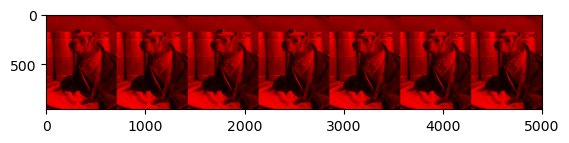

In [22]:
concatenate_color_image(np_image, 'R',7)

In [23]:
def concatenate_color_image(image, color='R', repeats=6):
    """
    Concatenates the given image horizontally multiple times based on the number of repeats and color.

    Parameters:
    image (numpy.ndarray): The input image to be concatenated.
    color (str, optional): The color to be used for concatenation. Valid options are 'R', 'G', or 'B'. Defaults to 'R'.
    repeats (int, optional): The number of times the image should be repeated horizontally. Defaults to 6.

    Returns:
    numpy.ndarray: The concatenated image.

    Raises:
    ValueError: If an invalid color is provided.

    """
    color_channels = {'R': (1, 2), 'G': (0, 2), 'B': (0, 1)}

    if color in color_channels:
        color_image = np.copy(image)
        color_image[:, :, color_channels[color]] = 0
    else:
        raise ValueError("Invalid color. Please choose 'R', 'G', or 'B'.")

    mirrored_image = np.flip(color_image, axis=1)
    upside_down_image = np.flip(color_image, axis=(0, 1))
    upside_down_mirror_image = np.flip(color_image, axis=0)

    images = [color_image, mirrored_image, upside_down_image, upside_down_mirror_image]
    joined_images = [np.concatenate([image] * repeats, axis=1) for image in images]
    full_image = np.concatenate(joined_images, axis=0)

    return full_image

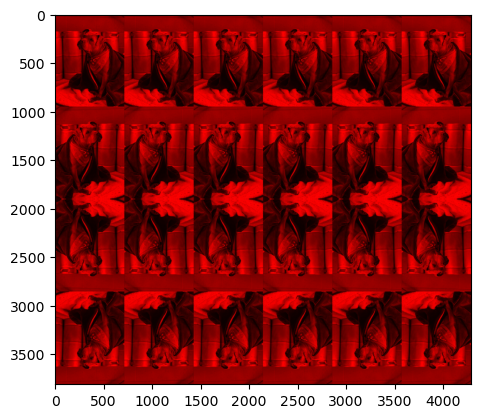

In [24]:
plt.imshow(concatenate_color_image(np_image))
plt.show()

In [25]:
def grid_with_flips(image, matrix):
    """
    Concatenates the given image horizontally multiple times based on the number of repeats and the flip matrix.

    Parameters:
    image (numpy.ndarray): The input image to be concatenated.
    matrix (list): The matrix specifying the type of flips to be performed on each image.

    Returns:
    numpy.ndarray: The concatenated image.

    Raises:
    ValueError: If an invalid flip matrix is provided.
    """

    flipped_images = []
    for row in matrix:
        flipped_row = []
        for flip_type in row:
            if flip_type == 1:
                flipped_image = np.flip(image, axis=1)
            elif flip_type == 2:
                flipped_image = np.flip(image, axis=(0, 1))
            elif flip_type == 3:
                flipped_image = np.flip(image, axis=0)
            elif flip_type != 0:
                raise ValueError("Invalid flip type. Please choose 0, 1, 2, or 3.")
            else:
                flipped_image = image
            flipped_row.append(flipped_image)
        flipped_images.append(flipped_row)

    joined_images = [np.concatenate(row, axis=1) for row in flipped_images]
    full_image = np.concatenate(joined_images, axis=0)

    return full_image

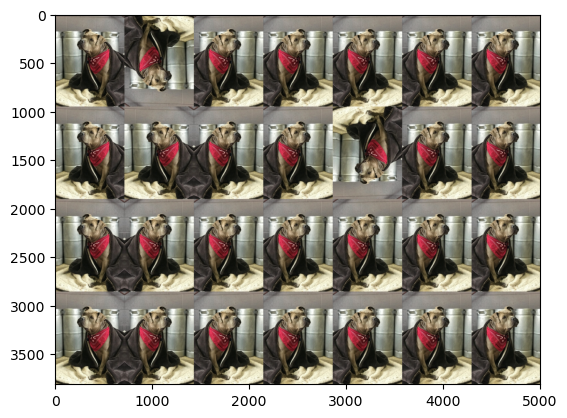

In [26]:
plt.imshow(grid_with_flips(np_image, [[0, 2, 1, 1, 1, 1, 1], [0, 0, 1, 1, 3, 1, 1], [0, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1]]))
plt.show()

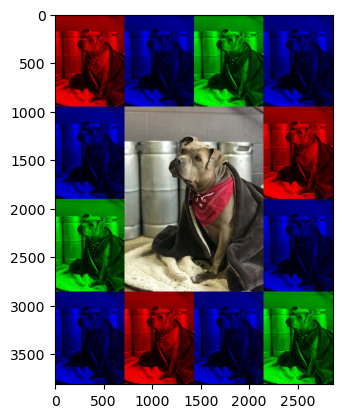

In [27]:
def create_image_from_matrix(matrix, np_image=np_image):
    """
    Creates an image from a matrix by mapping each element of the matrix to a corresponding image.

    Args:
        matrix (list): The matrix containing a list of colors starting left top and rotating clockwise.
        np_image (numpy.ndarray, optional): The original image as a numpy array. Defaults to np_image.

    Raises:
        ValueError: If an invalid color code is encountered.

    Returns:
        display: The final image created from the matrix.
    """

    # Define the middle matrix containing the sections of the middle image
    middle_matrix = ['p1','p2','p3','p4']

    # Rearrange the matrix elements to desired pattern
    new_matrix = matrix[:4] + [matrix[-1]] + middle_matrix[0:2] + [matrix[4]] + [matrix[-2]] + middle_matrix[2:4] + [matrix[5]] + matrix[6:10][::-1]

    # Reshape the matrix to a 4x4 matrix
    new_matrix = np.reshape(new_matrix, (4, 4)).tolist()

    # Create copies of the original image with specific color channels
    image_R = np_image.copy()
    image_R[:, :, (1, 2)] = 0
    image_G = np_image.copy()
    image_G[:, :, (0, 2)] = 0
    image_B = np_image.copy()
    image_B[:, :, (0, 1)] = 0

    # Resize original image and split into four pieces
    bigger_image = np_image.repeat(2, axis=0).repeat(2, axis=1)

    piece1 = bigger_image[:bigger_image.shape[0]//2, :bigger_image.shape[1]//2]
    piece2 = bigger_image[:bigger_image.shape[0]//2, bigger_image.shape[1]//2:]
    piece3 = bigger_image[bigger_image.shape[0]//2:, :bigger_image.shape[1]//2]
    piece4 = bigger_image[bigger_image.shape[0]//2:, bigger_image.shape[1]//2:]

    # Create a list to store the color images
    color_images = []
    for row in new_matrix:
        color_row = []
        for color in row:
            if color == 'r':	
                color_image = image_R.copy()
            elif color == 'b':
                color_image = image_B.copy()
            elif color == 'g':
                color_image = image_G.copy()
            elif color == 'p1':
                color_image = piece1.copy()
            elif color == 'p2':
                color_image = piece2.copy()
            elif color == 'p3':
                color_image = piece3.copy()
            elif color == 'p4':
                color_image = piece4.copy()
            else:
                raise ValueError("Invalid color. Please choose 'r', 'g' or 'b'.")
            color_row.append(color_image)            
        color_images.append(color_row)

    # Concatenate the color images to create the final image
    color_images = np.concatenate([np.concatenate(row, axis=1) for row in color_images], axis=0)

    # Display the final image
    plt.imshow(color_images)
    plt.show()

create_image_from_matrix(['r', 'b', 'g', 'b', 'r', 'b', 'g', 'b', 'r', 'b', 'g','b'])